In [3]:
import sys

sys.path.append('../../')

from pyACC.calculus import Integrate
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Initial mass function describes how star mass is distributed
#xi(M) = xi_0 * M^(-alpha)
#Salpeter IMF: alpha = 2.35

In [5]:
M1 = 2 #Msun
M2 = 125 #Msun
alpha = 2.35
xi_0 = 1 #constant relatng to the local stellar density

mass = np.linspace(M1, M2, 100)
xi = [xi_0 * m**(-alpha) for m in mass]

Text(0.5, 1.0, 'Salpeter IMF')

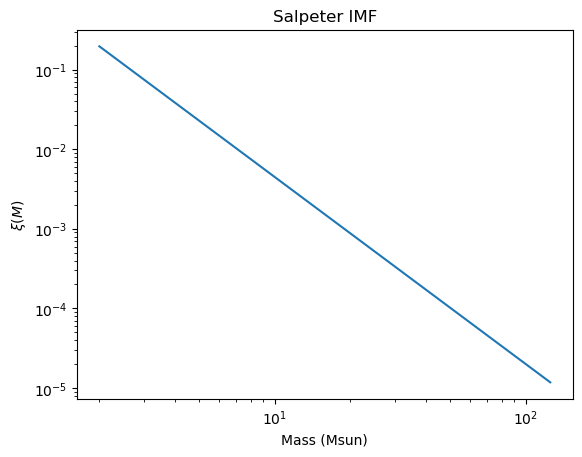

In [6]:
plt.loglog(mass, xi)
plt.xlabel('Mass (Msun)')
plt.ylabel(r'$\xi(M)$')
plt.title('Salpeter IMF')
#test with other alpha values

In [7]:
#total number of stars in a cluster with mass between M1 and M2
func_N = lambda x: xi_0 * x**(-alpha)
N= Integrate.adaptive_quadrature(func_N, M1, M2)
print('Total number of stars formed with mass between', M1, 'solar masses and', M2 ,'solar masses : ', N)

Total number of stars formed with mass between 2 solar masses and 125 solar masses :  0.2894931715327074


In [8]:
#total mass of stars in a cluster with mass between M1 and M2
func_M = lambda x: xi_0 * x**(-alpha) * x
M= Integrate.adaptive_quadrature(func_M, M1, M2)
print('Total mass of stars formed with mass between', M1, 'Msun and', M2 ,'Msun : ', M, 'Msun')

Total mass of stars formed with mass between 2 Msun and 125 Msun :  1.7144226684146133 Msun


In [9]:
print('Average mass of stars formed with mass between', M1, 'Msun and', M2 ,'Msun : ', M/N, 'Msun')

Average mass of stars formed with mass between 2 Msun and 125 Msun :  5.922152357990644 Msun


In [10]:
#luminosity
#L/Lsun = (M/Msun)^3.5 for main sequence stars with mass between 2 and 50 Msun
#L/Lsun = (M/Msun)^4 for main sequence stars with mass between 0.4 and 2 Msun
#L/Lsun = 32000 * (M/Msun) for M>50 Msun
L=[]
for m in mass:
    if m > 50:
        L = np.append(L,32000 * m) 
    elif m > 2:
        L = np.append(L, m**3.5)
    else:
        L = np.append(L, m**4)

In [11]:
sum_L = np.sum(L)

In [13]:
#average luminosity
print('Average luminosity of stars formed with mass between', M1, 'Msun and', M2 ,'Msun : ', sum_L/N, 'Lsun')

Average luminosity of stars formed with mass between 2 Msun and 125 Msun :  618416084.1182097 Lsun
